In [1]:
import pandas as pd 
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt

2023-06-01 09:27:11.212145: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-01 09:27:11.248422: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-01 09:27:11.249223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 09:27:11.852267: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dados ='/home/dev/PycharmProjects/FallDetection/dados.npy'
rotulos ='/home/dev/PycharmProjects/FallDetection/rotulos.npy'

In [3]:
import numpy as np
X = np.load(dados)
y = np.load(rotulos)

In [4]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividindo o conjunto de treinamento em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
X_train.shape

(988, 400, 1)

In [6]:
X_train.tolist()
y_train.tolist()
X_test.tolist()
y_test.tolist()
X_val.tolist()
y_val.tolist()


[1,
 6,
 5,
 6,
 2,
 6,
 4,
 0,
 3,
 5,
 4,
 5,
 5,
 0,
 4,
 7,
 0,
 4,
 6,
 2,
 4,
 2,
 6,
 1,
 6,
 6,
 7,
 2,
 4,
 0,
 6,
 4,
 2,
 0,
 6,
 6,
 0,
 4,
 4,
 2,
 3,
 3,
 0,
 2,
 6,
 0,
 4,
 5,
 4,
 6,
 2,
 0,
 6,
 4,
 0,
 6,
 1,
 0,
 2,
 0,
 6,
 0,
 7,
 0,
 6,
 1,
 5,
 1,
 4,
 1,
 4,
 5,
 3,
 0,
 1,
 4,
 0,
 6,
 4,
 0,
 4,
 1,
 4,
 1,
 2,
 4,
 2,
 2,
 0,
 4,
 5,
 4,
 0,
 0,
 1,
 7,
 5,
 7,
 1,
 6,
 2,
 4,
 6,
 6,
 3,
 4,
 6,
 5,
 3,
 5,
 5,
 4,
 2,
 0,
 5,
 4,
 1,
 0,
 1,
 4,
 0,
 1,
 2,
 4,
 3,
 6,
 0,
 6,
 6,
 0,
 6,
 0,
 6,
 6,
 5,
 6,
 2,
 6,
 6,
 2,
 0,
 4,
 2,
 4,
 1,
 4,
 5,
 5,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 4,
 6,
 1,
 2,
 6,
 1,
 4,
 0,
 4,
 2,
 4,
 3,
 6,
 4,
 0,
 6,
 1,
 7,
 6,
 1,
 4,
 4,
 2,
 1,
 0,
 6,
 1,
 0,
 2,
 6,
 0,
 0,
 6,
 4,
 4,
 6,
 5,
 4,
 3,
 0,
 5,
 6,
 1,
 4,
 1,
 5,
 6,
 1,
 5,
 1,
 0,
 1,
 6,
 6,
 5,
 3,
 6,
 0,
 4,
 1,
 2,
 4,
 0,
 1,
 4,
 7,
 4,
 6,
 4,
 2,
 1,
 6,
 2,
 4,
 4,
 1,
 6,
 1,
 4,
 2,
 5,
 1,
 4,
 2,
 6,
 0,
 1,
 2,
 5,
 2]

In [7]:
batch = int(len(y_train)/30)
batch

32

In [8]:
from keras.utils import np_utils
y_train_convertido = np_utils.to_categorical(y_train)
y_test_convertido =  np_utils.to_categorical(y_test)
y_val_convertido =  np_utils.to_categorical(y_val)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [10]:
modelo = Sequential()
modelo.add(Dense(60, input_dim=400, kernel_initializer='normal',activation="relu"))
modelo.add(Dense(60, kernel_initializer='normal',activation="relu"))
#modelo.add(Dense(60, kernel_initializer='normal',activation="relu"))
modelo.add(Dense(8, kernel_initializer='normal',activation="softmax"))

2023-06-01 09:27:14.194363: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-01 09:27:14.195082: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
from keras.optimizers import SGD
otimizador = SGD() 
modelo.compile(loss="categorical_crossentropy",optimizer=otimizador,metrics =["acc"])
historico = modelo.fit(X_train,y_train_convertido, epochs= 500, batch_size = batch, validation_data=(X_val,y_val_convertido), verbose = 1)

Epoch 1/500
31/31 [==============================] - 0s 5ms/step - loss: 2.0462 - acc: 0.1700 - val_loss: 2.0214 - val_acc: 0.2348
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 1.9912 - acc: 0.1984 - val_loss: 1.9751 - val_acc: 0.1700
Epoch 3/500
31/31 [==============================] - 0s 2ms/step - loss: 1.9465 - acc: 0.1994 - val_loss: 1.9514 - val_acc: 0.2308
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 1.9283 - acc: 0.2156 - val_loss: 1.9416 - val_acc: 0.2146
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 1.9206 - acc: 0.2146 - val_loss: 1.9357 - val_acc: 0.1984
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 1.9158 - acc: 0.2237 - val_loss: 1.9295 - val_acc: 0.2105
Epoch 7/500
31/31 [==============================] - 0s 2ms/step - loss: 1.9128 - acc: 0.2338 - val_loss: 1.9282 - val_acc: 0.2429
Epoch 8/500
31/31 [==============================] - 0s 2ms/step - loss: 1.9096 - a

31/31 [==============================] - 0s 2ms/step - loss: 0.8470 - acc: 0.7318 - val_loss: 0.8696 - val_acc: 0.7490
Epoch 64/500
31/31 [==============================] - 0s 2ms/step - loss: 0.8190 - acc: 0.7662 - val_loss: 0.9250 - val_acc: 0.6721
Epoch 65/500
31/31 [==============================] - 0s 2ms/step - loss: 0.8127 - acc: 0.7632 - val_loss: 0.8899 - val_acc: 0.6964
Epoch 66/500
31/31 [==============================] - 0s 2ms/step - loss: 0.7844 - acc: 0.7672 - val_loss: 0.9137 - val_acc: 0.5628
Epoch 67/500
31/31 [==============================] - 0s 2ms/step - loss: 0.7878 - acc: 0.7561 - val_loss: 0.8655 - val_acc: 0.7287
Epoch 68/500
31/31 [==============================] - 0s 2ms/step - loss: 0.8648 - acc: 0.7298 - val_loss: 0.8591 - val_acc: 0.7247
Epoch 69/500
31/31 [==============================] - 0s 2ms/step - loss: 0.7576 - acc: 0.7874 - val_loss: 0.9307 - val_acc: 0.6397
Epoch 70/500
31/31 [==============================] - 0s 2ms/step - loss: 0.8112 - acc: 0

Epoch 125/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4489 - acc: 0.8644 - val_loss: 0.4895 - val_acc: 0.8219
Epoch 126/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3962 - acc: 0.8806 - val_loss: 0.5644 - val_acc: 0.7935
Epoch 127/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3859 - acc: 0.8775 - val_loss: 0.4850 - val_acc: 0.8016
Epoch 128/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4387 - acc: 0.8593 - val_loss: 0.5068 - val_acc: 0.8057
Epoch 129/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5775 - acc: 0.8138 - val_loss: 0.5288 - val_acc: 0.7935
Epoch 130/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3902 - acc: 0.8796 - val_loss: 0.4868 - val_acc: 0.8219
Epoch 131/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3925 - acc: 0.8664 - val_loss: 1.2215 - val_acc: 0.6073
Epoch 132/500
31/31 [==============================] - 0s 2ms/step - 

31/31 [==============================] - 0s 2ms/step - loss: 0.2890 - acc: 0.9049 - val_loss: 0.7381 - val_acc: 0.7814
Epoch 187/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2669 - acc: 0.9038 - val_loss: 0.4441 - val_acc: 0.8462
Epoch 188/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2813 - acc: 0.9049 - val_loss: 0.4909 - val_acc: 0.8097
Epoch 189/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3163 - acc: 0.8957 - val_loss: 0.4234 - val_acc: 0.8421
Epoch 190/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2599 - acc: 0.9059 - val_loss: 0.4253 - val_acc: 0.8543
Epoch 191/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4840 - acc: 0.8340 - val_loss: 0.6279 - val_acc: 0.7935
Epoch 192/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3305 - acc: 0.8897 - val_loss: 0.5786 - val_acc: 0.8340
Epoch 193/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3162 -

Epoch 248/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2071 - acc: 0.9251 - val_loss: 0.4644 - val_acc: 0.8421
Epoch 249/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1989 - acc: 0.9312 - val_loss: 0.4306 - val_acc: 0.8543
Epoch 250/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3305 - acc: 0.8806 - val_loss: 0.4848 - val_acc: 0.8300
Epoch 251/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2756 - acc: 0.9059 - val_loss: 0.4501 - val_acc: 0.8583
Epoch 252/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2123 - acc: 0.9261 - val_loss: 0.5778 - val_acc: 0.8178
Epoch 253/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3006 - acc: 0.9109 - val_loss: 0.4736 - val_acc: 0.8462
Epoch 254/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3619 - acc: 0.8877 - val_loss: 0.7172 - val_acc: 0.8219
Epoch 255/500
31/31 [==============================] - 0s 2ms/step - 

31/31 [==============================] - 0s 2ms/step - loss: 0.1741 - acc: 0.9362 - val_loss: 0.5010 - val_acc: 0.8381
Epoch 310/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2362 - acc: 0.9170 - val_loss: 0.6469 - val_acc: 0.8057
Epoch 311/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1890 - acc: 0.9302 - val_loss: 0.4866 - val_acc: 0.8543
Epoch 312/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1909 - acc: 0.9372 - val_loss: 0.5961 - val_acc: 0.8300
Epoch 313/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2138 - acc: 0.9302 - val_loss: 0.4514 - val_acc: 0.8502
Epoch 314/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1864 - acc: 0.9393 - val_loss: 0.4708 - val_acc: 0.8543
Epoch 315/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1793 - acc: 0.9352 - val_loss: 0.4916 - val_acc: 0.8583
Epoch 316/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1560 -

Epoch 371/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1700 - acc: 0.9413 - val_loss: 0.5932 - val_acc: 0.8421
Epoch 372/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2831 - acc: 0.9028 - val_loss: 0.5613 - val_acc: 0.8502
Epoch 373/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1461 - acc: 0.9443 - val_loss: 0.5165 - val_acc: 0.8502
Epoch 374/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1433 - acc: 0.9524 - val_loss: 0.5263 - val_acc: 0.8543
Epoch 375/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1484 - acc: 0.9474 - val_loss: 0.4832 - val_acc: 0.8543
Epoch 376/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1385 - acc: 0.9575 - val_loss: 0.5084 - val_acc: 0.8502
Epoch 377/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1277 - acc: 0.9626 - val_loss: 0.5488 - val_acc: 0.8664
Epoch 378/500
31/31 [==============================] - 0s 2ms/step - 

31/31 [==============================] - 0s 2ms/step - loss: 0.5264 - acc: 0.8219 - val_loss: 0.6736 - val_acc: 0.8016
Epoch 433/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2318 - acc: 0.9241 - val_loss: 0.6125 - val_acc: 0.8259
Epoch 434/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1575 - acc: 0.9393 - val_loss: 0.5695 - val_acc: 0.8502
Epoch 435/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1540 - acc: 0.9484 - val_loss: 0.5348 - val_acc: 0.8583
Epoch 436/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1225 - acc: 0.9626 - val_loss: 0.5749 - val_acc: 0.8664
Epoch 437/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1704 - acc: 0.9383 - val_loss: 0.5894 - val_acc: 0.8502
Epoch 438/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1374 - acc: 0.9494 - val_loss: 0.5652 - val_acc: 0.8623
Epoch 439/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1108 -

Epoch 494/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2403 - acc: 0.9190 - val_loss: 0.5858 - val_acc: 0.8462
Epoch 495/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1621 - acc: 0.9464 - val_loss: 0.5907 - val_acc: 0.8421
Epoch 496/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1824 - acc: 0.9271 - val_loss: 0.6858 - val_acc: 0.8219
Epoch 497/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1567 - acc: 0.9453 - val_loss: 0.5545 - val_acc: 0.8462
Epoch 498/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1513 - acc: 0.9504 - val_loss: 0.7520 - val_acc: 0.8057
Epoch 499/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1562 - acc: 0.9545 - val_loss: 0.6240 - val_acc: 0.8462
Epoch 500/500
31/31 [==============================] - 0s 2ms/step - loss: 0.2261 - acc: 0.9211 - val_loss: 0.5932 - val_acc: 0.8502


In [12]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                24060     
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dense_2 (Dense)             (None, 8)                 488       
                                                                 
Total params: 28,208
Trainable params: 28,208
Non-trainable params: 0
_________________________________________________________________


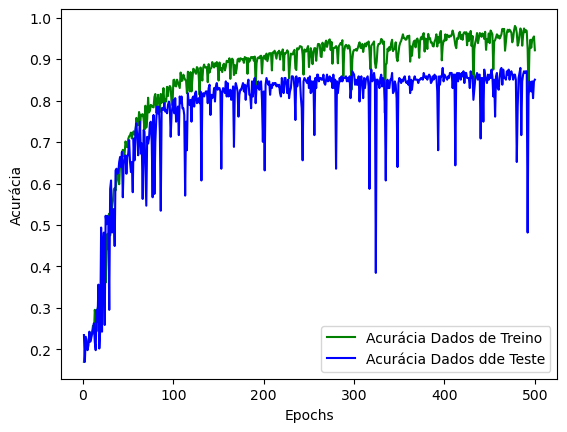

In [13]:
import matplotlib.pyplot as plt


acuracia_treino = historico.history['acc'] 
acuracia_teste = historico.history['val_acc']

epochs = range(1, len(acuracia_treino)+1) 

plt.plot(epochs,acuracia_treino, "-g", label="Acurácia Dados de Treino") 
plt.plot(epochs,acuracia_teste, "-b", label = "Acurácia Dados dde Teste")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.show()

10/10 [==============================] - 0s 819us/step


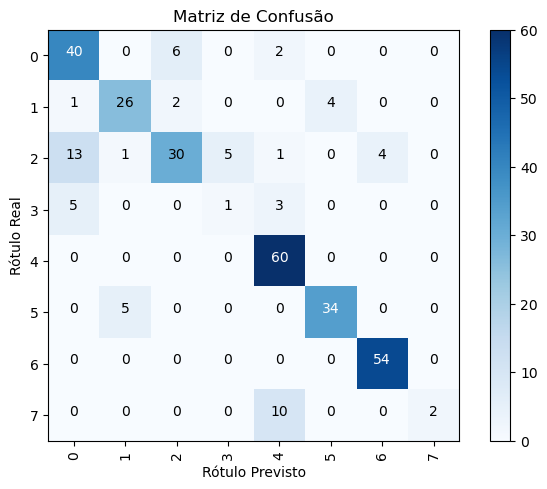

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Obtendo as probabilidades das classes previstas
y_pred_probs = modelo.predict(X_test)

# Obtendo as classes previstas
y_pred = np.argmax(y_pred_probs, axis=1)

# Obtendo as classes reais
y_true = np.argmax(y_test_convertido, axis=1)

# Calculando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plotando a matriz de confusão
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(0, 8)
plt.xticks(tick_marks, rotation=90)
plt.yticks(tick_marks)

# Adicionando os números nas células da matriz
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.show()


In [15]:
from sklearn.metrics import classification_report


target_names = np.arange(0, 8).astype(str)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        48
           1       0.81      0.79      0.80        33
           2       0.79      0.56      0.65        54
           3       0.17      0.11      0.13         9
           4       0.79      1.00      0.88        60
           5       0.89      0.87      0.88        39
           6       0.93      1.00      0.96        54
           7       1.00      0.17      0.29        12

    accuracy                           0.80       309
   macro avg       0.76      0.67      0.67       309
weighted avg       0.80      0.80      0.78       309

